In [79]:
import sys
import pandas as pd


# import custom modules
sys.path.append('../../utils/')
import data_paths
from traffic_counts import TrafficCounts

In [125]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [80]:
file_path = data_paths.COUNTING_PATH + 'counting_data_combined.parquet'
counting_df = pd.read_parquet(file_path)

In [99]:
aggregeted_counting_df = counting_df.groupby(['road_type','vehicle_class','date']).sum().reset_index()
aggregeted_counting_df.to_csv('agg_counting_data.csv')

In [100]:
counting_df.columns

Index(['road_link_id', 'vehicle_class', 'date', 'daily_value', 'road_type', 'complete', 'day_type', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], dtype='object')

In [103]:
limited_counting_df = counting_df[['road_link_id', 'vehicle_class', 'date', 'daily_value']]

In [120]:
train_set = limited_counting_df[(limited_counting_df['road_link_id'] == 3.80000000e+01) & (limited_counting_df['vehicle_class'] == 'SUM')][['date','daily_value']]
train_set['date'] = pd.to_datetime(train_set['date'])
train_set.set_index('date', inplace=True)
train_set = train_set.asfreq(pd.infer_freq(train_set.index))

Text(0, 0.5, 'Volume')

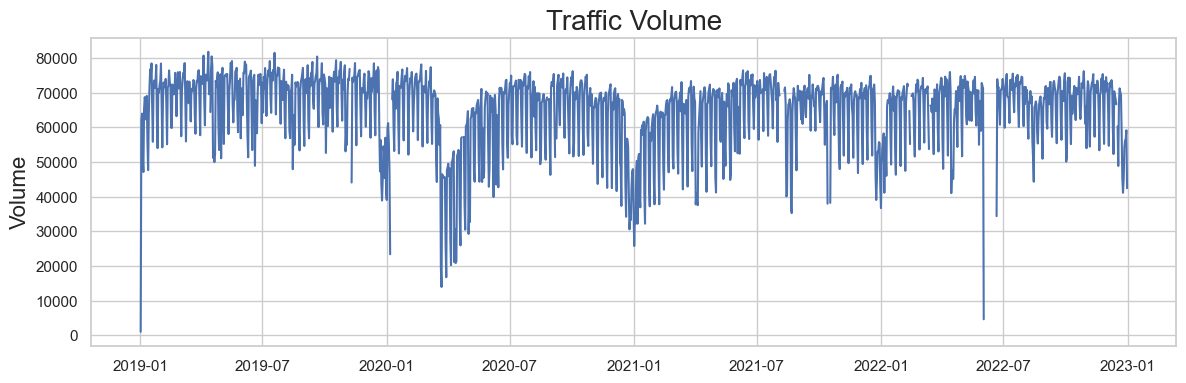

In [122]:
#plot
plt.figure(figsize=(14,4))
plt.plot(train_set)
plt.title('Traffic Volume', fontsize=20)
plt.ylabel('Volume', fontsize=16)

In [126]:
arima = ARIMA(train_set['daily_value'], order=(12,1,1))
predictions = arima.fit().predict()

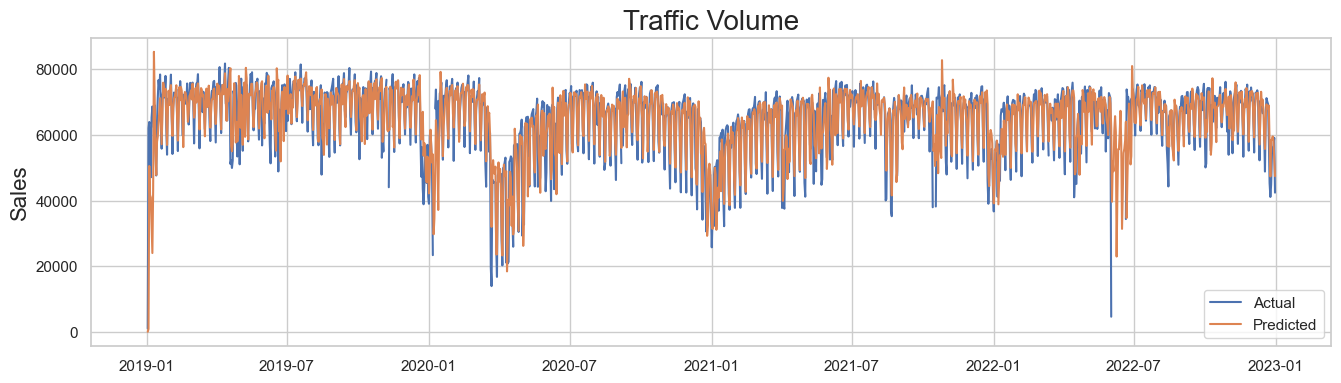

In [130]:
plt.figure(figsize=(16,4))
plt.plot(train_set, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Traffic Volume', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()